In [38]:
import numpy as np
class Player():
    def __init__(self, x_0, y_0, height=1.8, has_ball=True, d_ability=2, t_ability=0.9):
        self.x=x_0
        self.y=y_0
        self.h=height
        self.has_ball=has_ball
        self.dist_total=0
        self.d_ability=d_ability
        self.t_ability=t_ability
        if has_ball:
            self.prob_lb=0
        else:
            self.prob_lb=1
    def move(self, dx, dy, ball):
        self.x+=dx
        self.y+=dy
        dist=np.sqrt(self.x**2+self.y**2)
        self.dist_total+=dist
        self.prob_lb = 1-np.exp(- self.d_ability / self.dist_total)
        ball.x=self.x
        ball.y=self.y
        r=np.random.rand()
        if r<self.prob_lb:
            self.has_ball=False
        else:
            self.has_ball=True
        
L=30
W=16
hop_height=3.05
hop_x=30
hop_y=8
class Ball():
    def __init__(self,):
        #nothing to initialize
        self.x=None
        self.y=None
    def move(self, v, alpha, beta, player):
        x=player.x
        y=player.y
        z=player.h
        dt=0.01
        vh=v*np.cos(alpha)
        vv=v*np.sin(alpha)
        vh_x=vh*np.cos(beta)
        vh_y=vh*np.sin(beta)
        dx_tot=0
        dy_tot=0
        xL=[]
        yL=[]
        zL=[]
        scored=False
        while z>0:
            dx=vh_x*dt
            dy=vh_y*dt
            x+=dx
            y+=dy
            z+=vv*dt
            vv-=9.8*dt
            xL.append(x)
            yL.append(y)
            zL.append(z)
            if np.abs(x-hop_x)<0.1 and np.abs(y-hop_y)<0.1 and np.abs(z-hop_height)<0.1:
                scored=True
                break
        return xL, yL, zL, scored

    

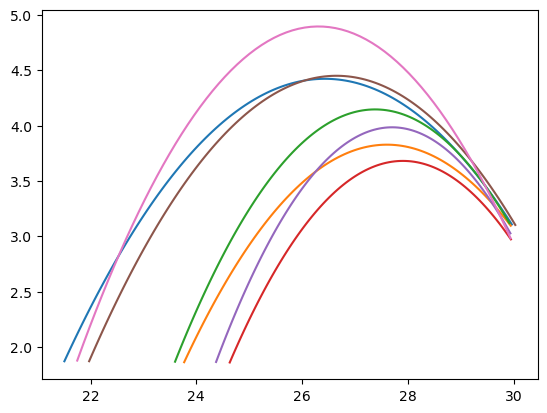

In [37]:

ball=Ball()
import matplotlib.pyplot as plt
for i in range(150):
    player=Player(15, 8)
    dx=np.random.rand()*10
    player.move(dx, 0, ball)
    speed=np.random.rand()*3+7
    inclination=np.random.rand()*15+45
    xL,yL,zL,scored=ball.move(speed, np.radians(inclination), 0, player)
    if scored:
        plt.plot(xL,zL)
        #plt.plot(xL,zL)